In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Cellular Automata

In [56]:
def rulegen(num, r=1):
    states = [tuple([int(d) for d in f"{bin(i)[2:]:0>3}"]) for i in reversed(range(2**(2*r+1)))]
    rule = [int(d) for d in f"{bin(num)[2:]:0>{(2**(2*r+1))}}"]
    return {s:d for s,d in zip(states, rule)}
    return dic

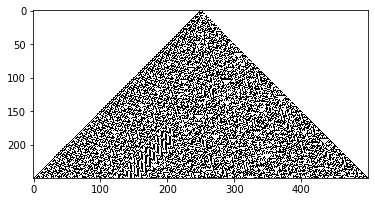

In [57]:
R = 30
N = 500
F = rulegen(R)

M = np.zeros((N//2,N))
M[0,N//2] = 1
# M[0] = np.random.random(size=N).round(0)

for rowi in range(0,(N//2)-1):
    for coli in range(0,N):
        M[rowi+1, (coli+1)%N] = F[
            M[rowi,(coli)%N],
            M[rowi,(coli+1)%N],
            M[rowi,(coli+2)%N],
        ]

plt.figure(figsize=(10,10))
plt.imshow(M, interpolation="none", cmap="Greys")
plt.show()

array([ 24, 136,   2,  14, 156])

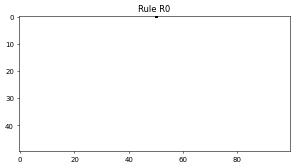

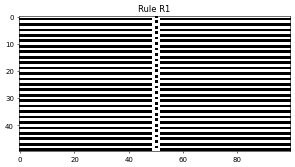

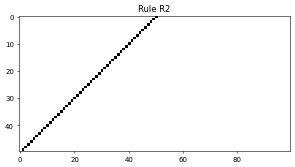

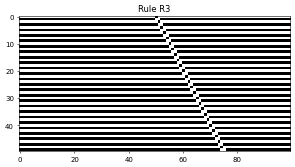

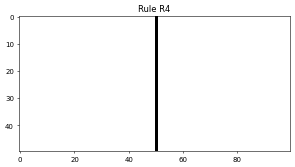

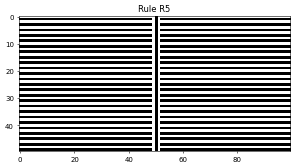

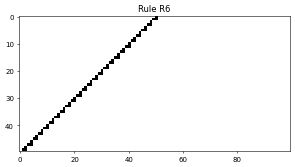

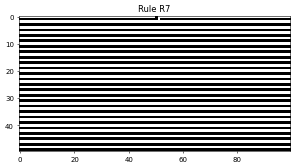

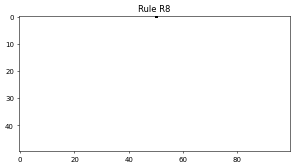

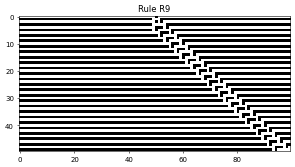

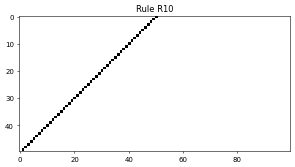

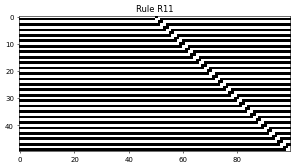

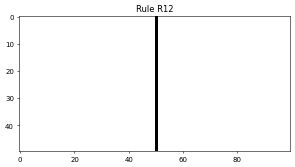

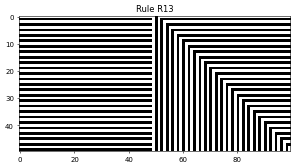

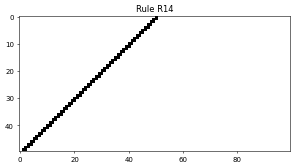

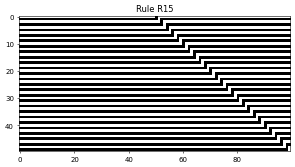

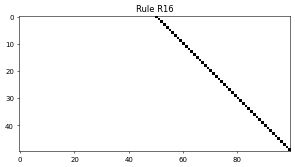

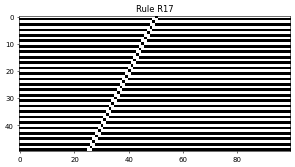

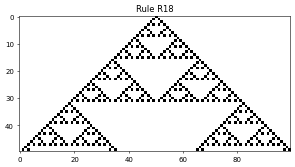

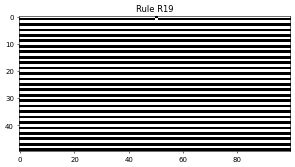

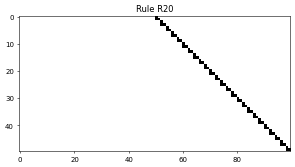

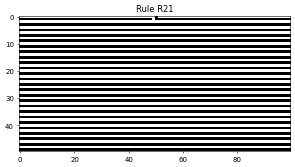

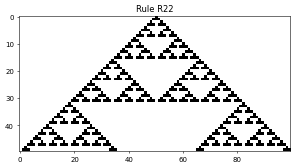

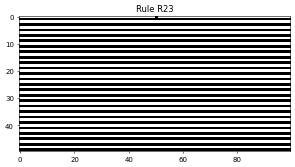

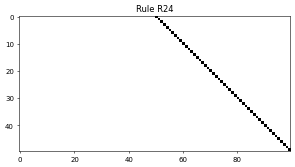

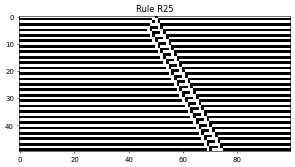

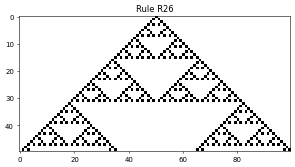

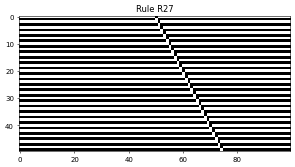

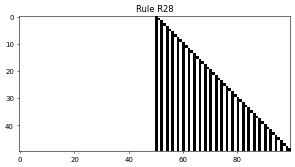

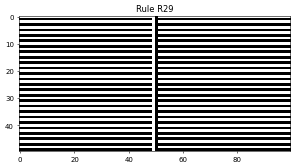

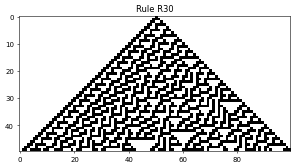

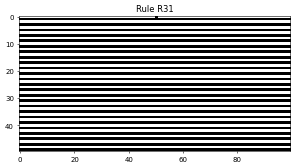

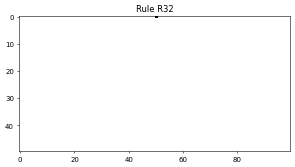

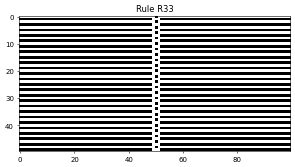

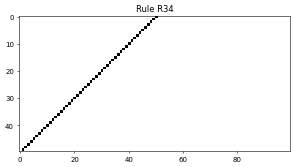

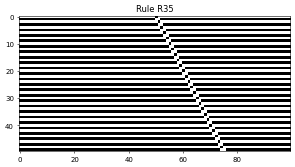

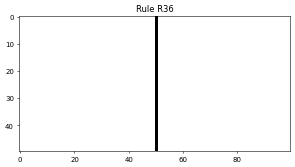

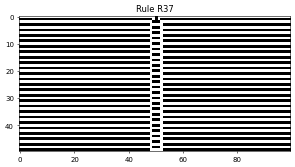

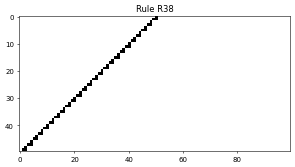

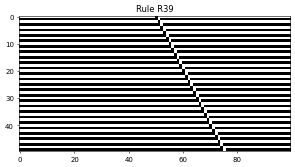

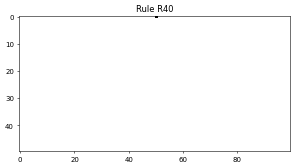

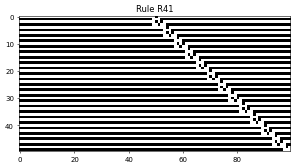

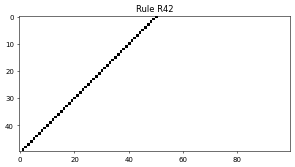

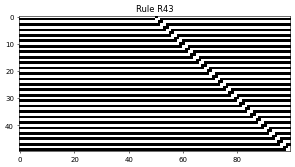

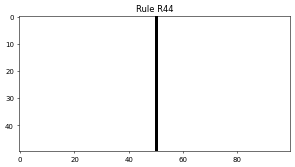

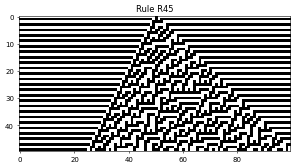

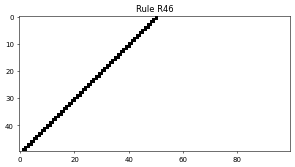

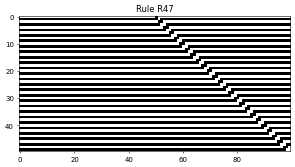

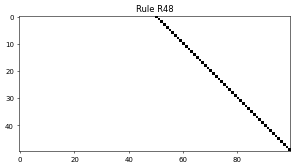

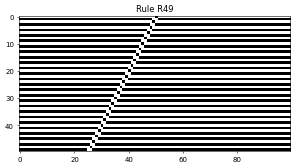

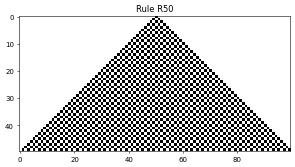

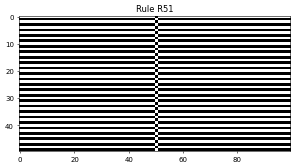

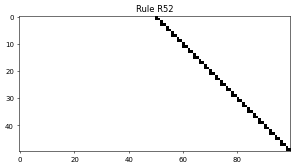

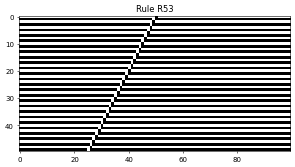

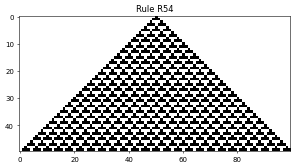

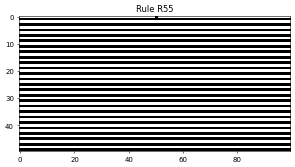

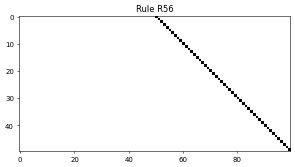

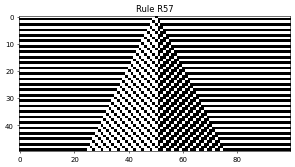

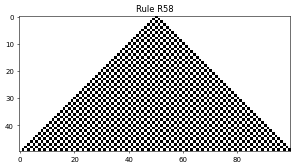

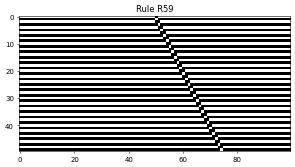

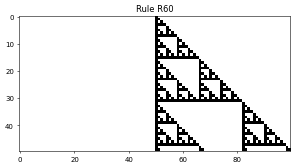

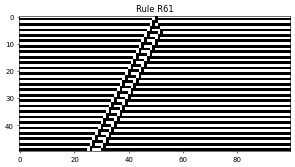

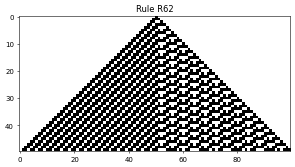

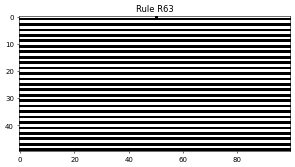

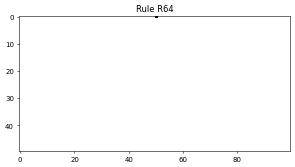

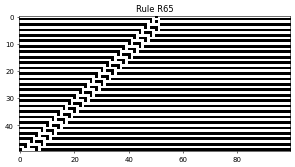

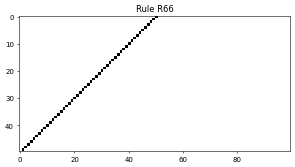

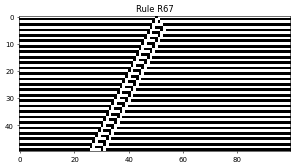

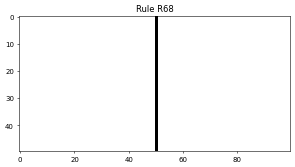

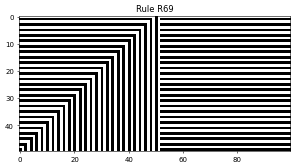

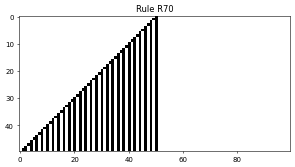

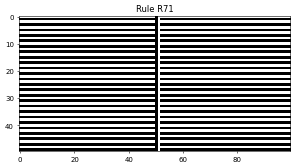

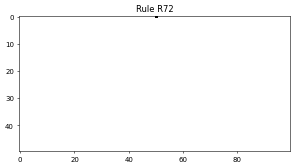

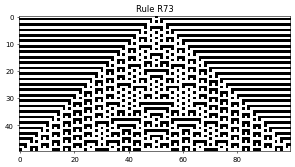

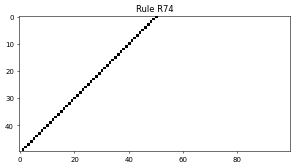

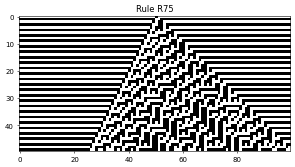

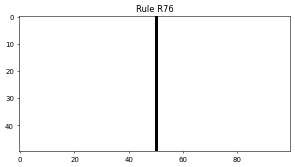

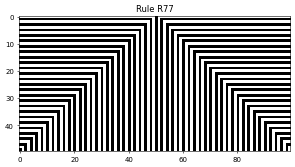

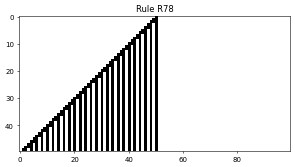

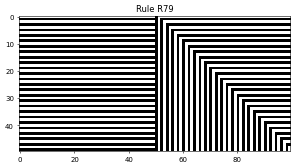

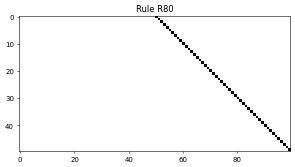

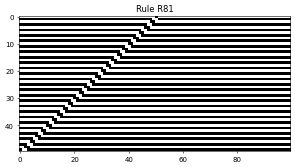

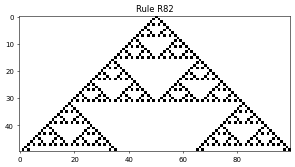

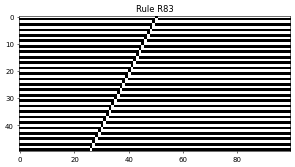

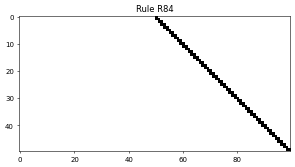

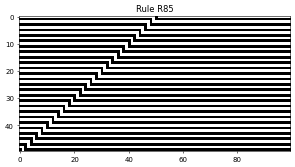

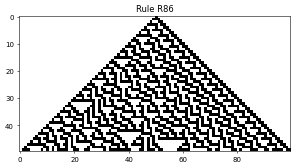

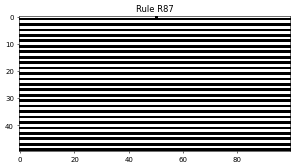

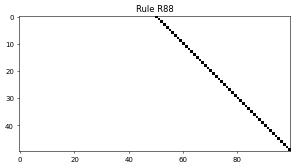

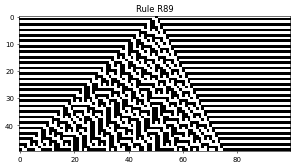

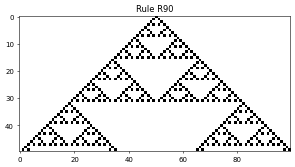

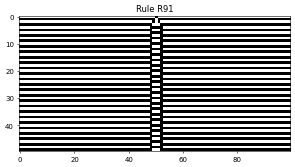

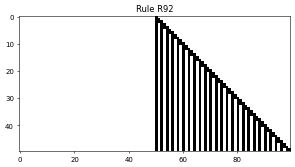

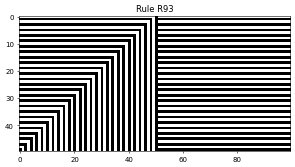

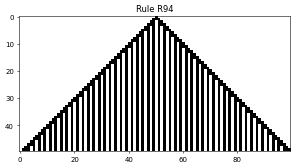

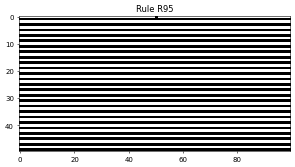

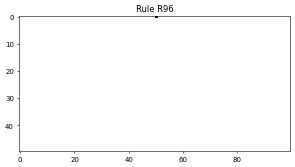

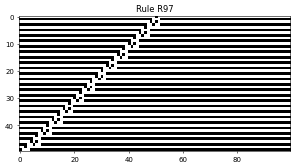

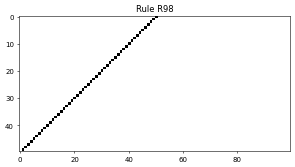

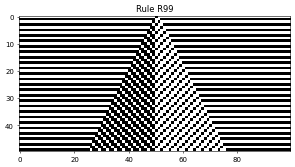

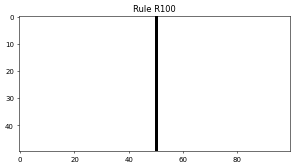

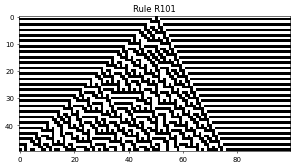

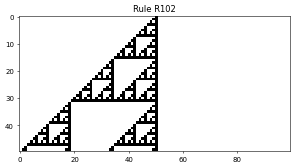

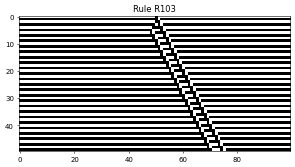

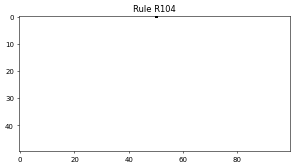

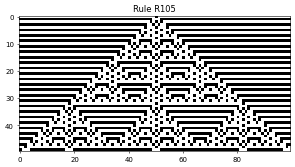

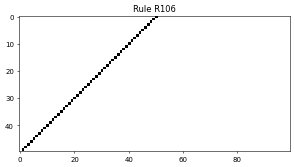

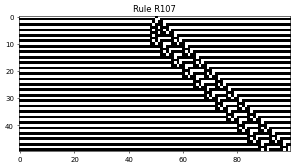

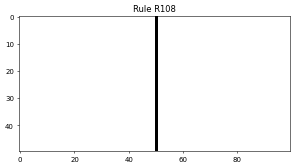

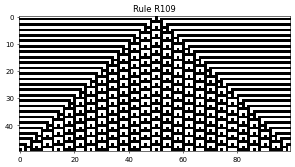

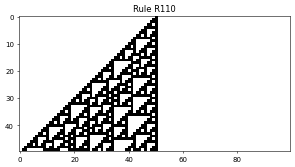

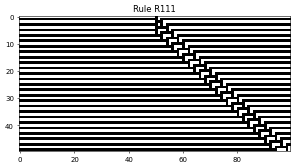

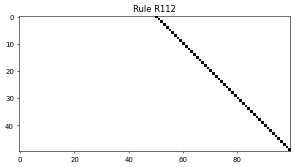

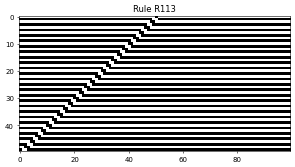

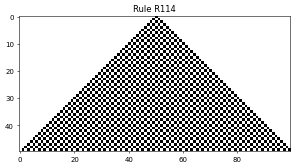

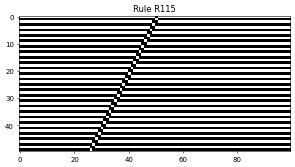

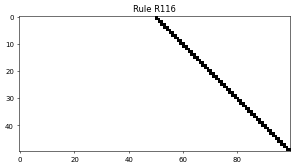

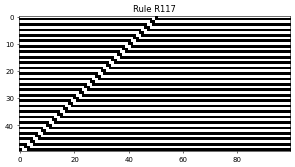

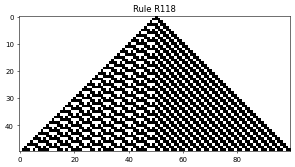

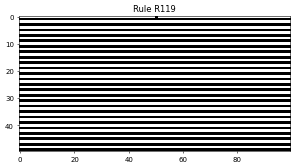

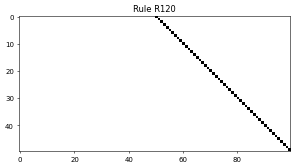

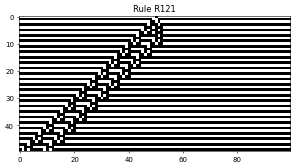

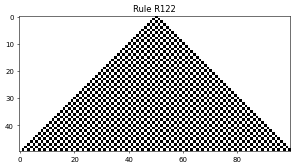

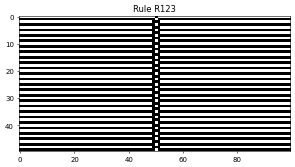

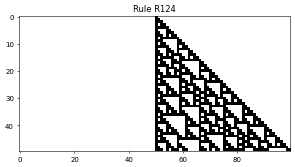

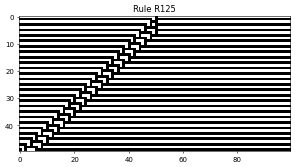

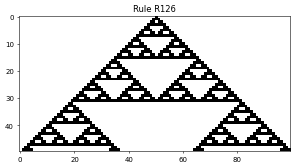

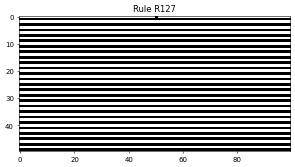

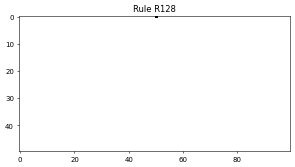

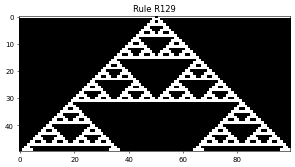

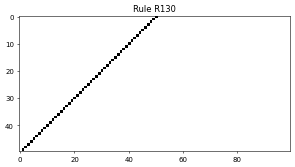

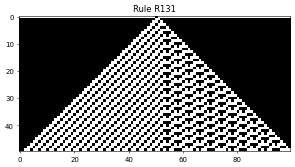

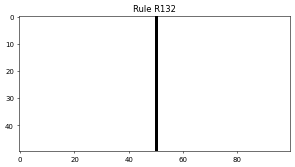

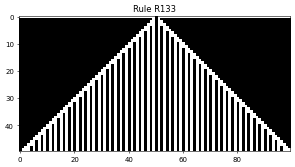

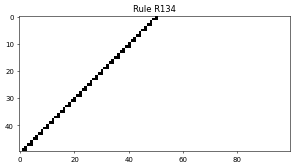

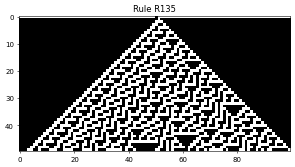

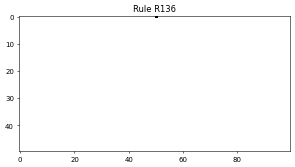

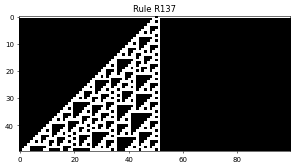

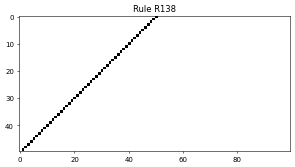

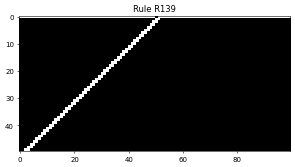

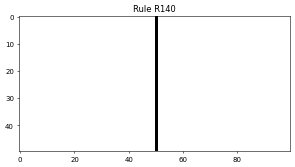

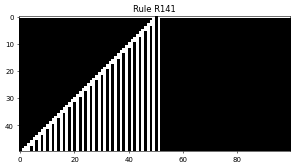

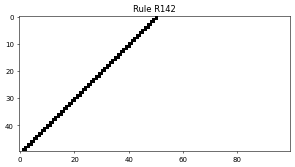

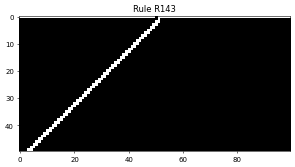

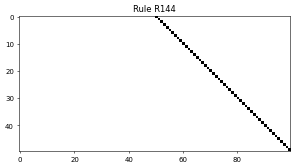

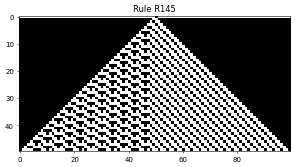

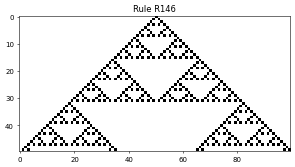

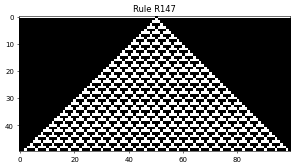

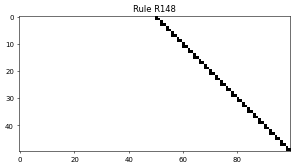

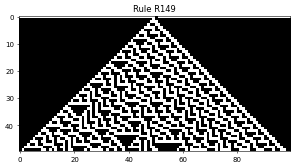

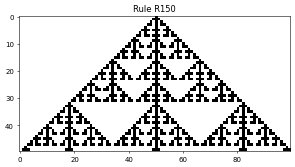

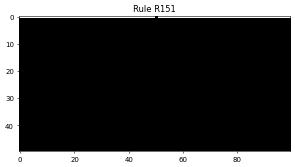

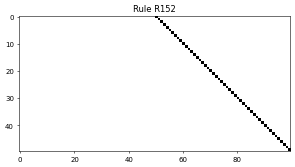

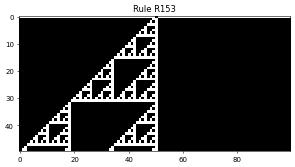

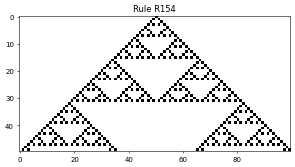

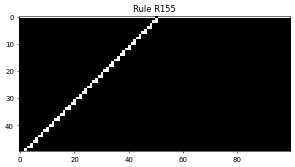

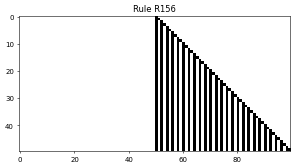

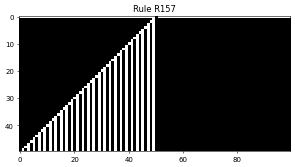

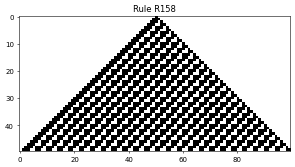

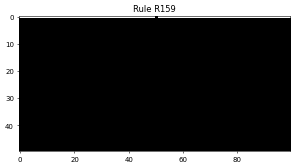

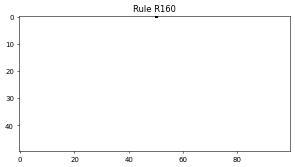

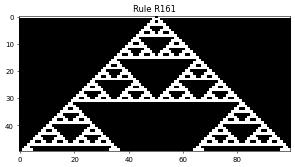

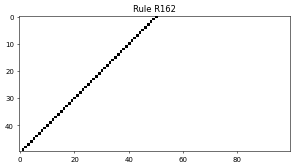

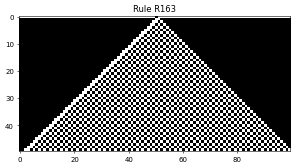

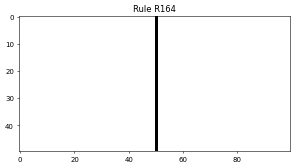

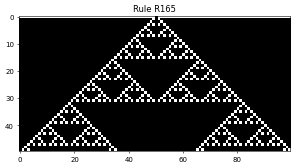

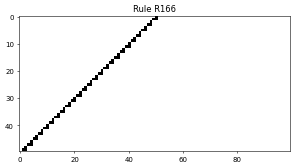

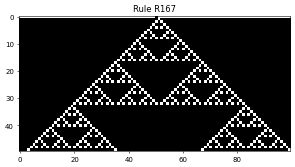

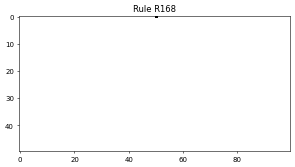

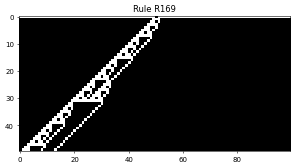

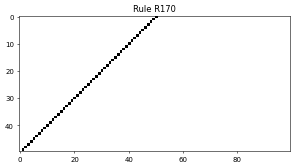

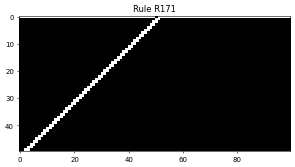

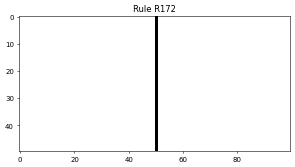

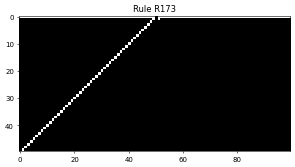

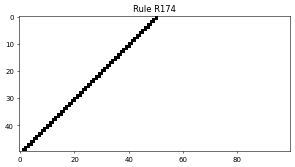

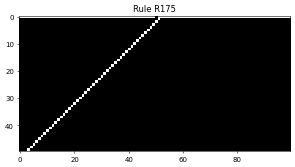

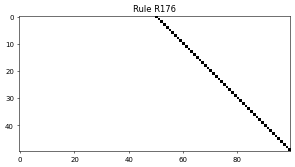

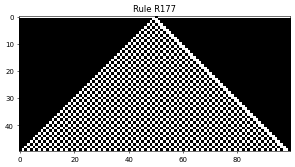

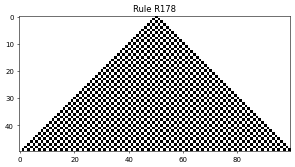

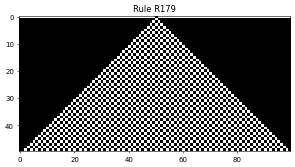

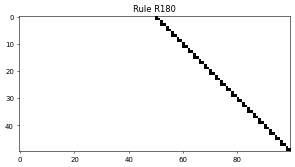

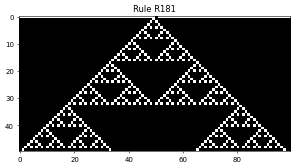

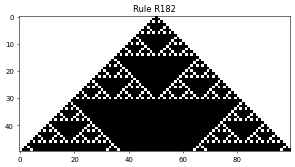

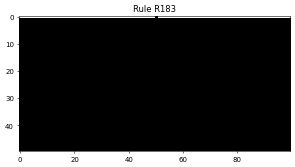

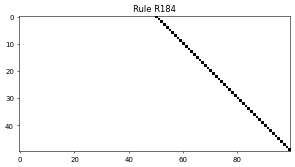

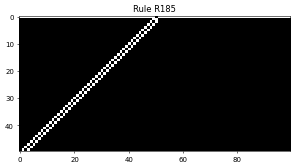

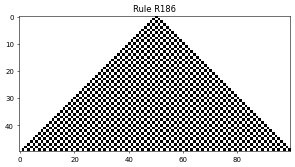

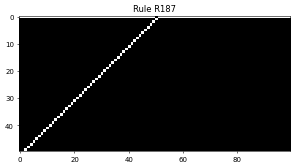

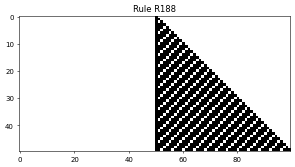

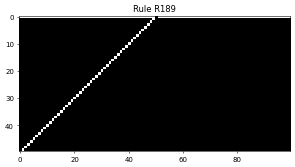

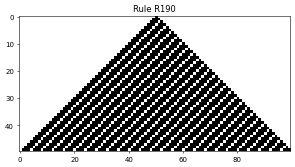

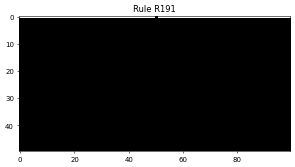

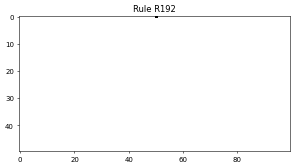

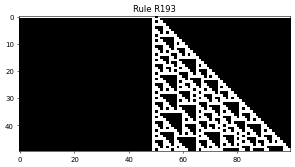

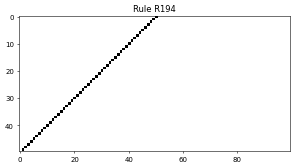

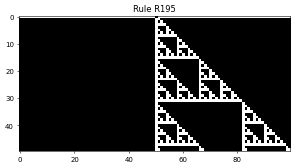

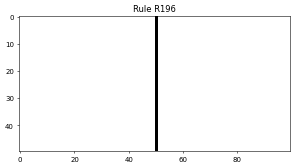

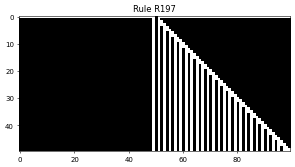

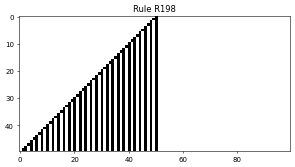

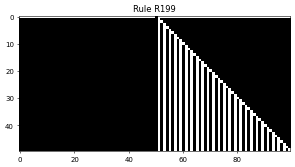

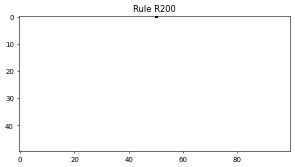

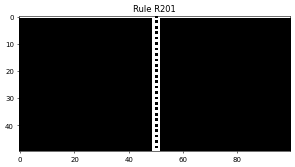

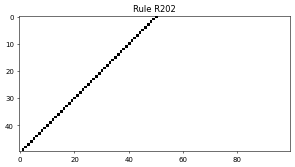

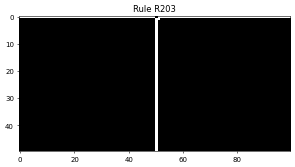

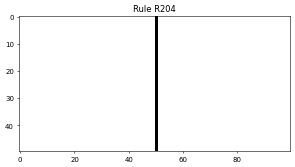

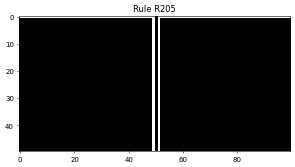

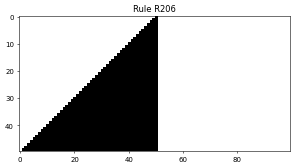

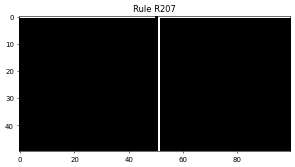

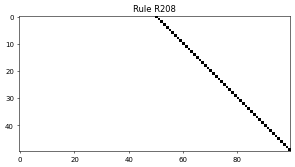

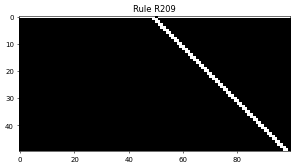

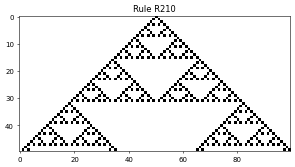

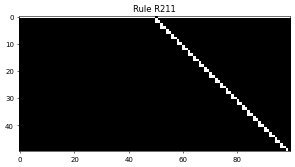

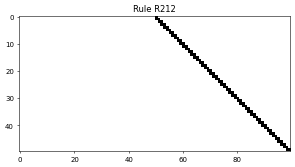

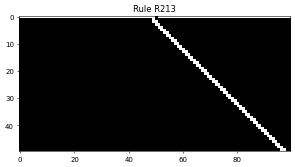

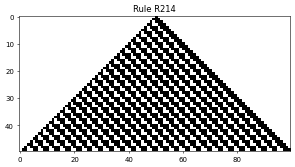

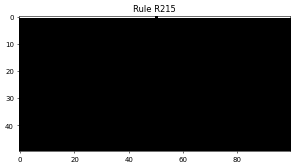

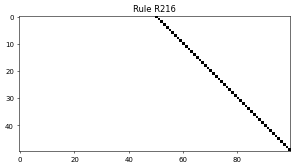

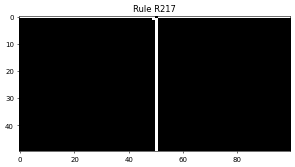

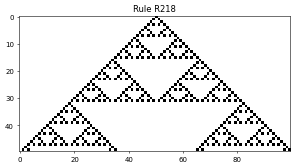

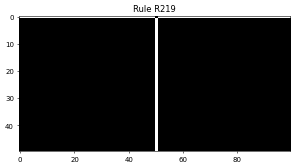

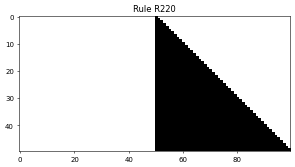

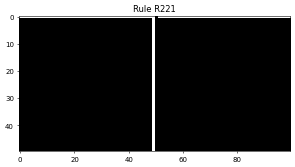

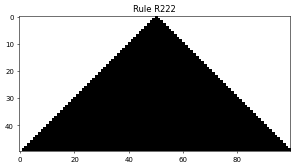

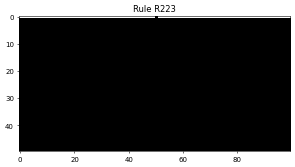

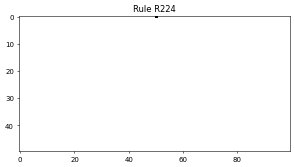

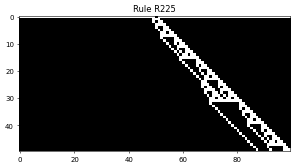

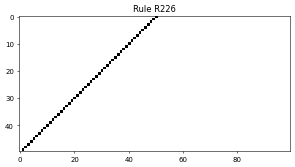

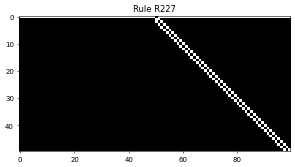

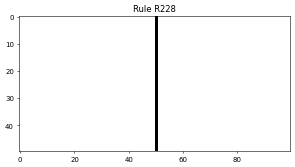

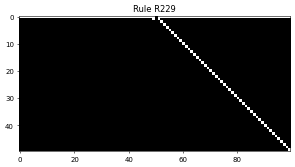

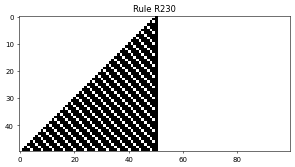

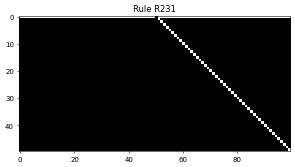

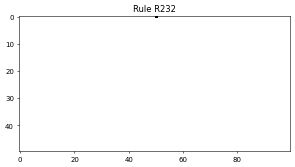

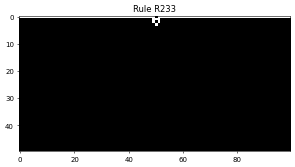

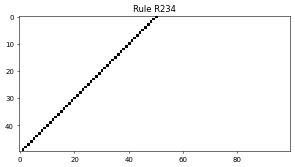

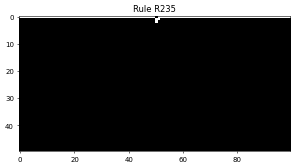

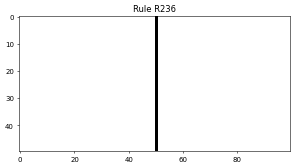

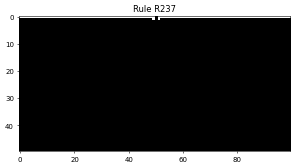

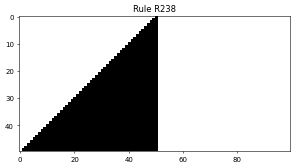

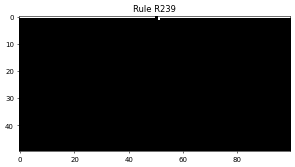

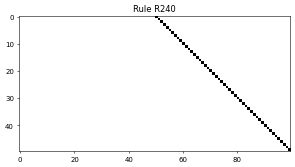

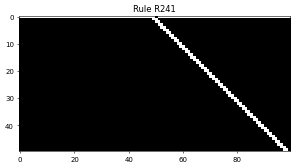

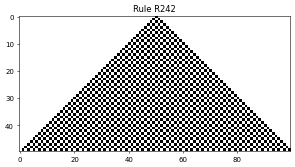

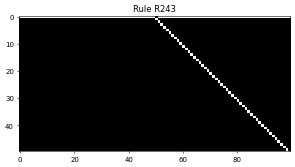

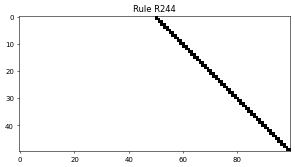

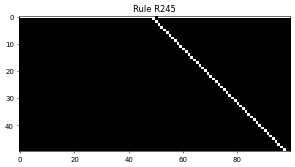

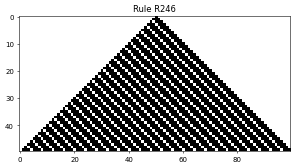

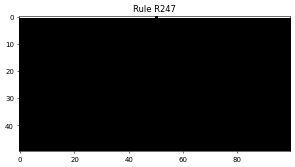

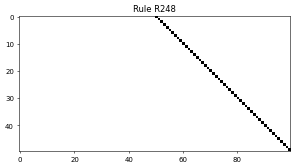

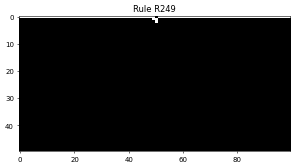

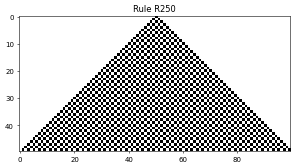

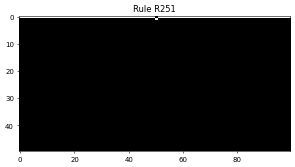

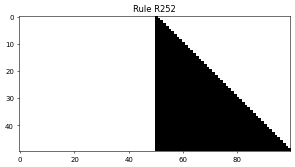

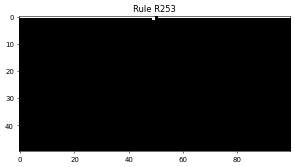

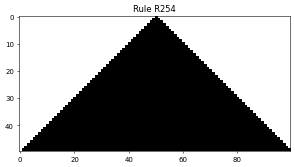

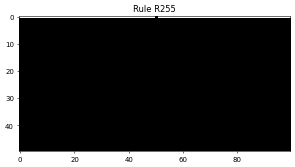

In [84]:
N = 100

# for R in [30,99,110,150,45]:
# for R in np.random.randint(0,255,size=20):
for R in range(256):
    F = rulegen(R)
    M = np.zeros((N//2,N))
    M[0,N//2] = 1
    for rowi in range(0,(N//2)-1):
        for coli in range(0,N):
            M[rowi+1, (coli+1)%N] = F[
                M[rowi,(coli)%N],
                M[rowi,(coli+1)%N],
                M[rowi,(coli+2)%N],
            ]

    plt.figure(figsize=(7,7), dpi=50)
    plt.title(f"Rule R{R}")
    plt.imshow(M, interpolation="none", cmap="Greys")
    # vmin, vmax = sorted(np.random.random(size=2)*3-1)
    # vmin = min(vmin, 0)
    # vmax = max(vmax, 1)
    # plt.imshow(M, interpolation="none", cmap="turbo",
    #     vmin=vmin, vmax=vmax)
    plt.show()

## λ-parameter

# Perculations

In [9]:
N = 20
p = 0.40
L = np.random.random(size=(N,N))
L = np.where(L>p, 1, 0)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
ax1.imshow(L, interpolation="none", cmap="Greys")

# TODO: below algorithm is wrong, need recursive / tree based algorithm
# for i in range(N):
#     for j in range(N):
#         if i == N-1 or j == N-1 or i == 0 or j == 0 or L[i,j] == 0:
#                 continue
#         else:
#             L[i,j] = max(
#                 L[i+1,j],
#                 L[i,j+1],
#                 L[i-1,j],
#                 L[i,j-1],
#             )
#             L[i,j] += (
#                 int(L[i+1,j]>0) + int(L[i-1,j]>0) + 
#                 int(L[i,j+1]>0) + int(L[i,j-1]>0)
# #             )
#             if L[i+1,j] != 0: L[i+1,j] = L[i,j]
#             if L[i,j+1] != 0: L[i,j+1] = L[i,j]
#             if L[i-1,j] != 0: L[i-1,j] = L[i,j]
#             if L[i,j-1] != 0: L[i,j-1] = L[i,j]

todo = set([(i,j) for i in range(N) for j in range(N)])
done = set([])
while todo:
    (i,j) = todo.pop()
    if i == N or j == N or i == -1 or j == -1 or L[i,j] == 0:
        done.add((i,j))
        continue
    else:
        maxn = L[i,j]
        if i+1 != N: maxn = max(L[i,j], L[i+1,j])
        if i-1 != -1: maxn = max(L[i,j], L[i-1,j])
        if j+1 != N: maxn = max(L[i,j], L[i,j+1])
        if j-1 != -1: maxn = max(L[i,j], L[i,j-1])
        if L[i,j] == 1:
            L[i,j] = maxn + 1
        elif L[i,j] > 1 and L[i,j] < maxn:
            L[i,j] = maxn
        elif L[i,j] == maxn:
            # done.add((i,j))

        neighbours = {(i+1,j), (i,j+1), (i-1,j), (i,j-1)}
        todo = todo | neighbours  # add neighbours to todo
        todo = todo - done  # remove dones from todo


ax2.imshow(L, interpolation="none", cmap="Greys")

x, y = np.unravel_index(np.argmax(L), shape=L.shape)
maxx = np.max(L) + 1
L[x,y] = maxx

todo = set([(x,y)])
done = set([])

while todo:
    (i,j) = todo.pop()
    done.add((i,j))
    if i == N or j == N or i == -1 or j == -1 or L[i,j] == 0:
        continue
    else:
        L[i,j] = maxx
        neighbours = {(i+1,j), (i,j+1), (i-1,j), (i,j-1)}
        todo = todo | neighbours  # add neighbours to todo
        todo = todo - done  # remove dones from todo

L = np.where((L>0) & (L<maxx), 1, L)
L = np.where((L==maxx), 4, L)

ax3.imshow(L, interpolation="none", cmap="Greys")
plt.show()

IndentationError: expected an indented block (<ipython-input-9-17cef8301a3e>, line 50)